In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/Black_Friday/train.csv")
test = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/Black_Friday/test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [7]:
X = train.loc[:, train.columns != 'Purchase']
y = train['Purchase']
data = pd.concat([X, test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Product_Category_3,545809,69.6
Product_Category_2,245982,31.4


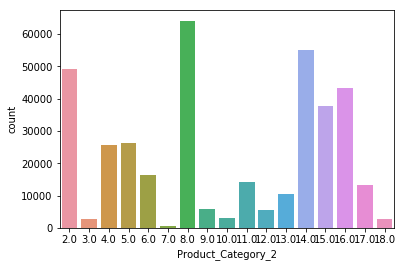

In [9]:
sns.countplot(X['Product_Category_2'])

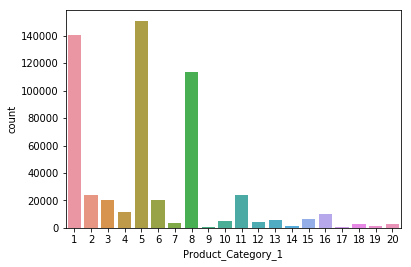

In [10]:
sns.countplot(X['Product_Category_1'])

In [11]:
# Look at the unique values for 2 and drop 3:

print('Product_Category_2', data['Product_Category_2'].unique())
data.drop(['Product_Category_3'],axis=1,inplace=True)

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [12]:
# So all values are in integer range. May be we can assign value one (as there are none) for the NaN cases
data.fillna(value=1,inplace=True)

# Also looks like the product categories are float while they can be int.
data["Product_Category_2"] = data["Product_Category_2"].astype(int)

In [13]:
data['User_ID'].unique().size

5891

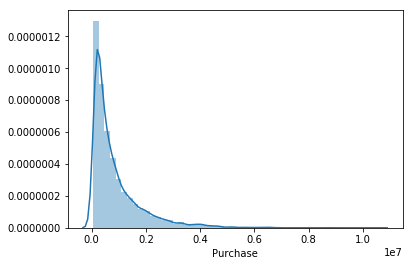

In [14]:
# Shows us how much each customer spent

unique_purchase = train.groupby(['User_ID'])['Purchase'].sum()
sns.distplot(unique_purchase)

In [15]:
# Now for apriori, we want to predict which items a user will purchase given previous purchase history

from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
user_profiles=train[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].drop_duplicates()
user_profiles.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


User Profiles: Count Plots Across Categorical Variables

72% of the users are Males

35% are from Age group: 26-35

53% are from City C

35% have stayed in their current city for only 1 year.

58% are still single

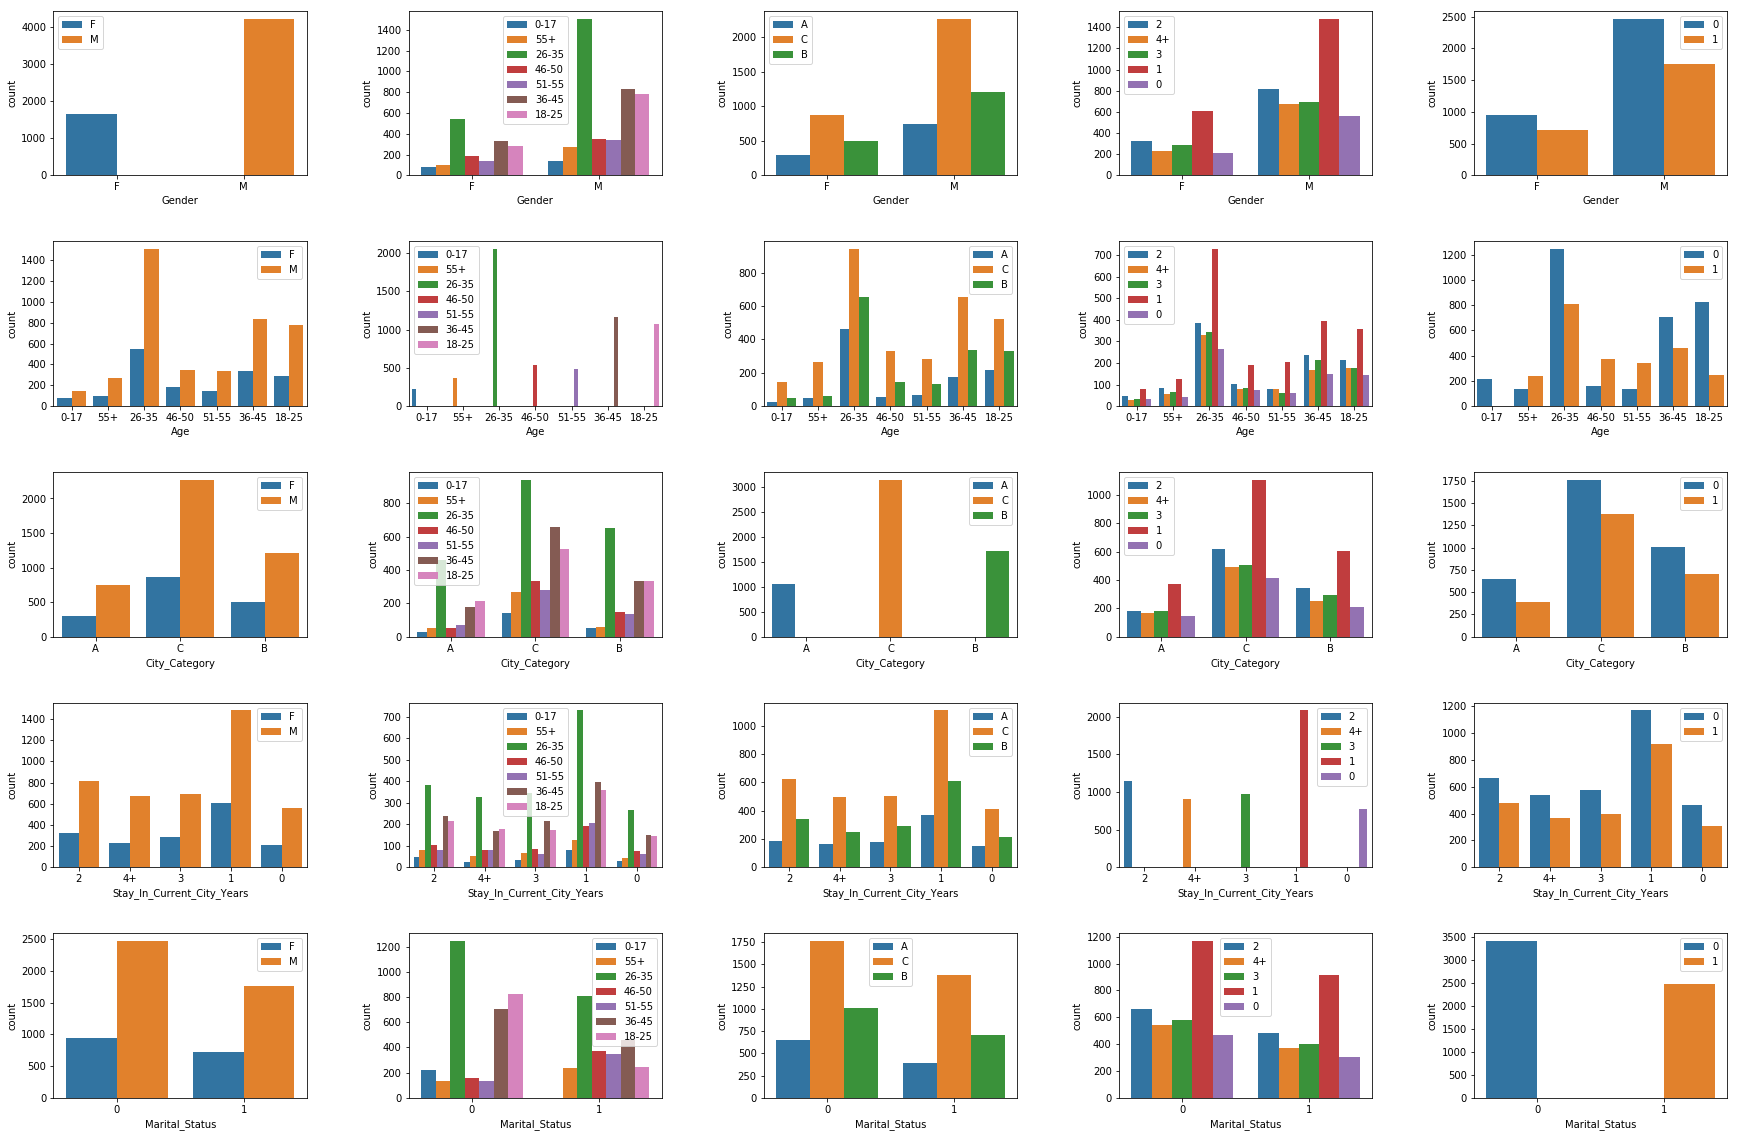

In [17]:
import matplotlib.pyplot as plt

columns=['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, (len(columns)**2)+1):
    ax=fig.add_subplot(len(columns), len(columns), i)
    ax=sns.countplot(user_profiles[columns[int((i-1)/len(columns))]],hue=columns[((i-1)%len(columns))],data=user_profiles)
    ax=plt.legend(loc='best')

plt.show()

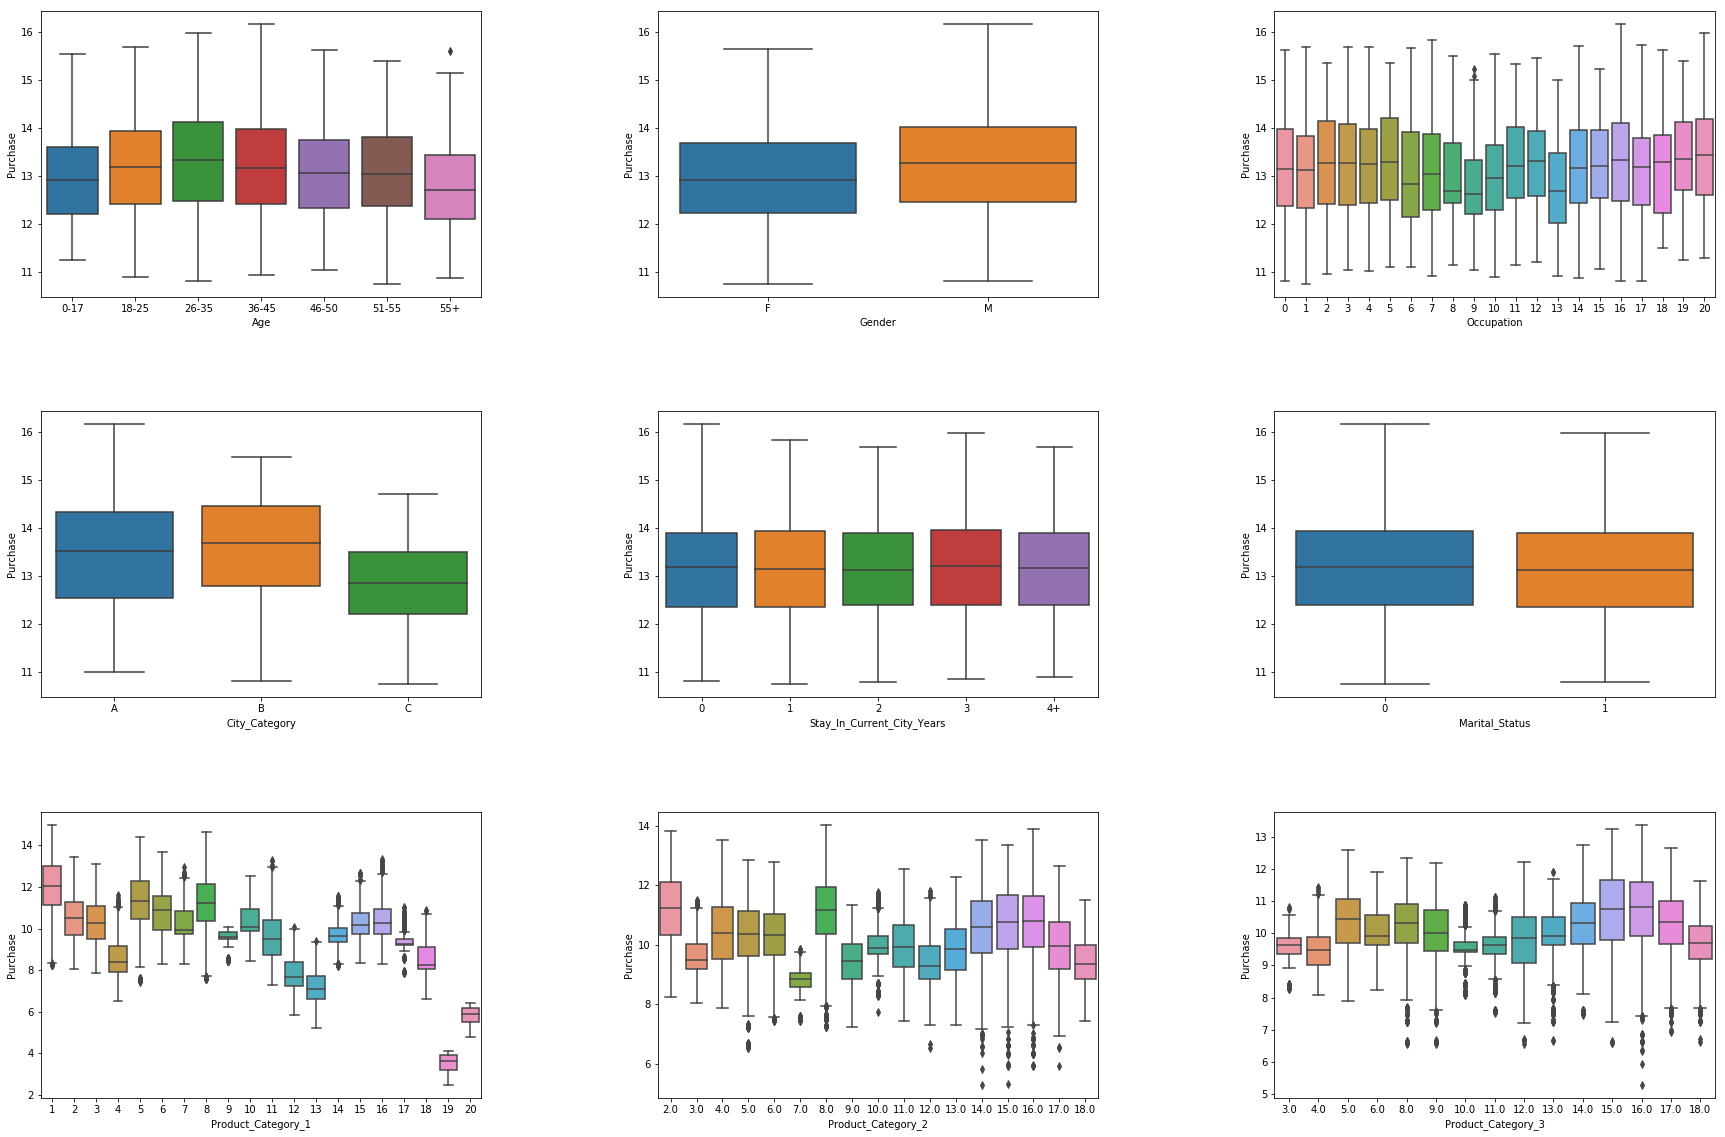

In [18]:
columns=['Age','Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, (len(columns))+1):
    temp=train[['User_ID',columns[i-1],'Purchase']].groupby(['User_ID',columns[i-1]]).agg('sum').reset_index().sort_values('Purchase',ascending=False)
    temp=temp.sort_values(columns[i-1]) 
    ax=fig.add_subplot(3, 3, i)
    ax=sns.boxplot(x=columns[i-1],y=np.log(temp.Purchase),data=temp)

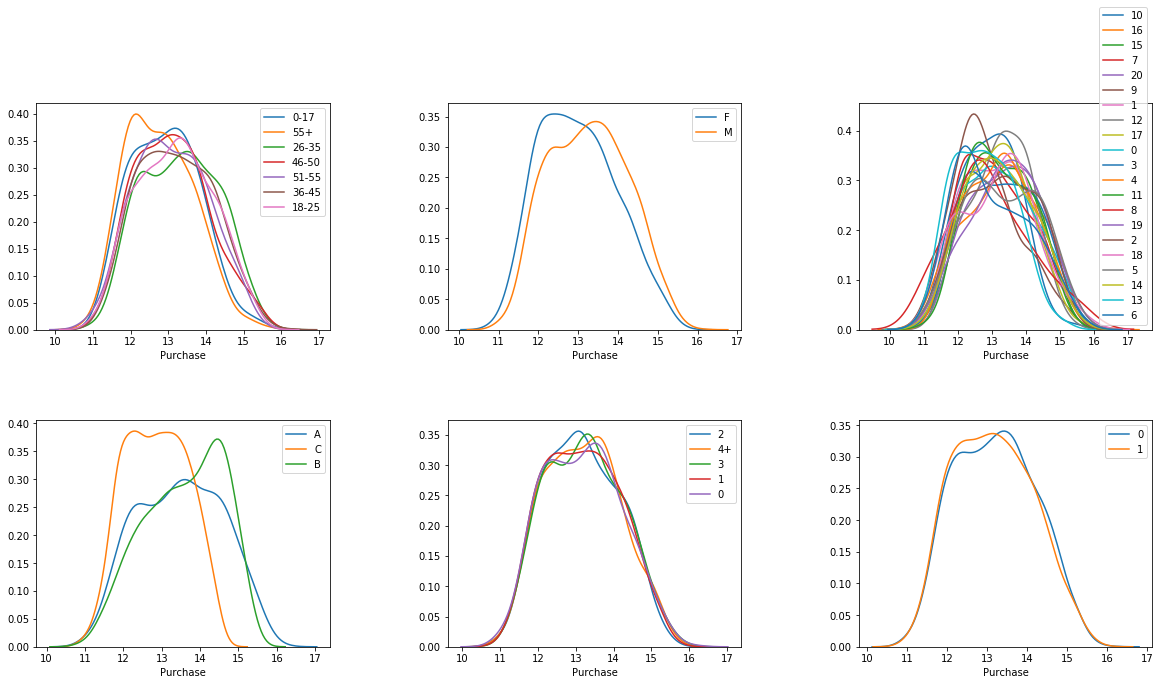

In [19]:
# Distplot: Distribution of Purchase Amount Across Different Categories

columns=['Age','Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, (len(columns))+1):
    label=[]
    temp=train[['User_ID',columns[i-1],'Purchase']].groupby(['User_ID',columns[i-1]]).agg('sum').reset_index().sort_values('Purchase',ascending=False)
    ax=fig.add_subplot(2, 3, i)
    for j in list(train[columns[i-1]].unique()):
        hist_data=temp[temp[columns[i-1]]==j]
        ax=sns.distplot(np.log(hist_data.Purchase),hist=False,label=j)
        label.append(j)

In [20]:
# Product Popularity by Category
def product_popularity_barplot(Category):    
    by_cat=train[['Product_Category_1',Category,'User_ID']].groupby(['Product_Category_1',Category]).agg('count').reset_index()
    by_cat=by_cat.pivot(index='Product_Category_1',columns=Category)['User_ID'].reset_index()

    for i in by_cat.columns[1:]:
        by_cat[i] = by_cat[i]/train[train[Category]==i].count()[0]

    by_cat=by_cat.melt('Product_Category_1', var_name=Category, value_name='Val')

    columns=by_cat[Category].unique().tolist()
    fig,ax=plt.subplots(1,len(columns),sharey=True)
    fig.set_figheight(5)
    fig.set_figwidth(8*len(columns))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    for i in range(0, (len(columns))):
        temp=by_cat[by_cat[Category]==columns[i]]
        title=str(Category)+':'+str(columns[i])  
        sns.barplot(x='Product_Category_1',y='Val',data=temp,ax=ax[i])
        ax[i].set_title(title,fontsize=20)

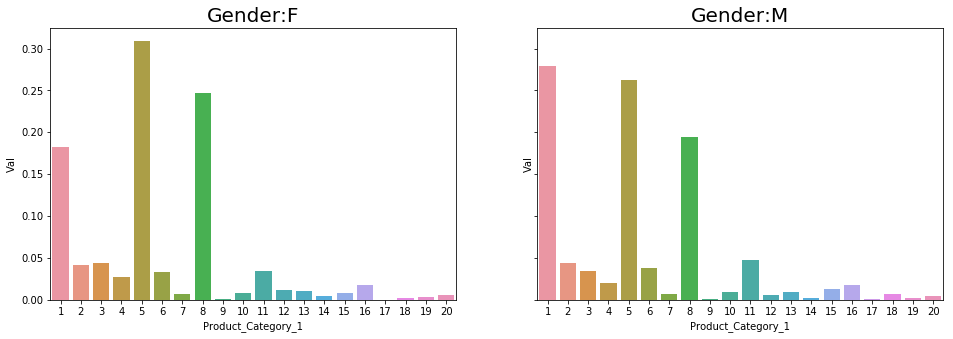

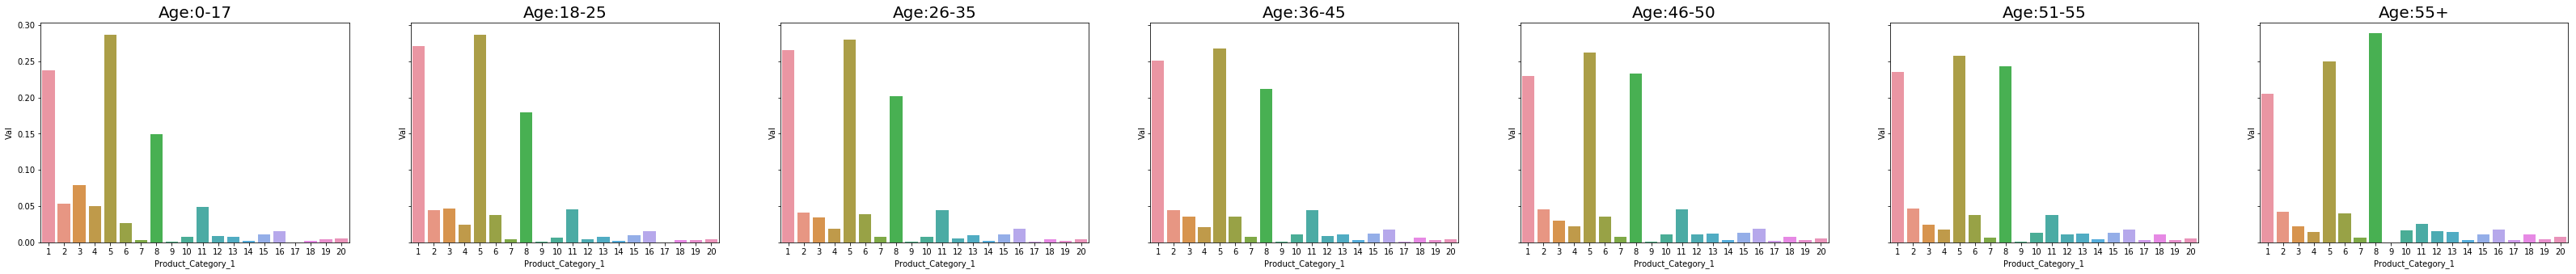

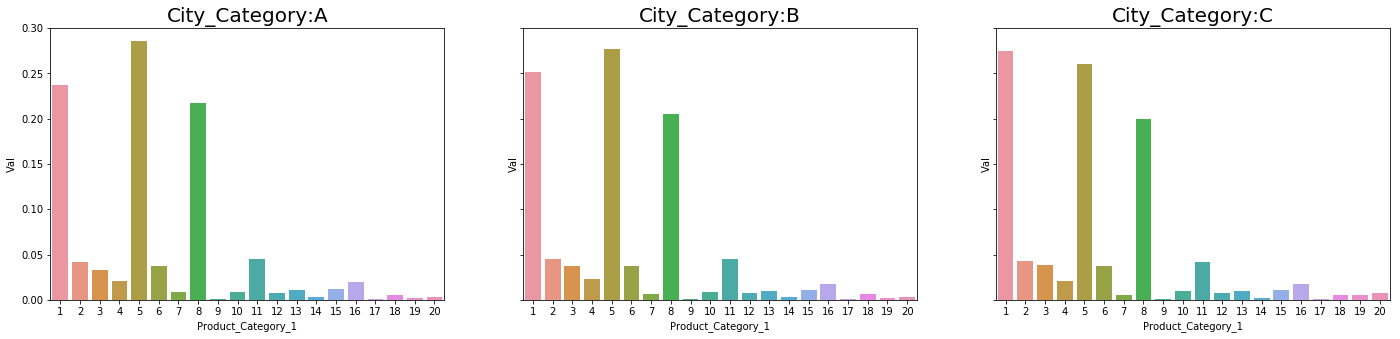

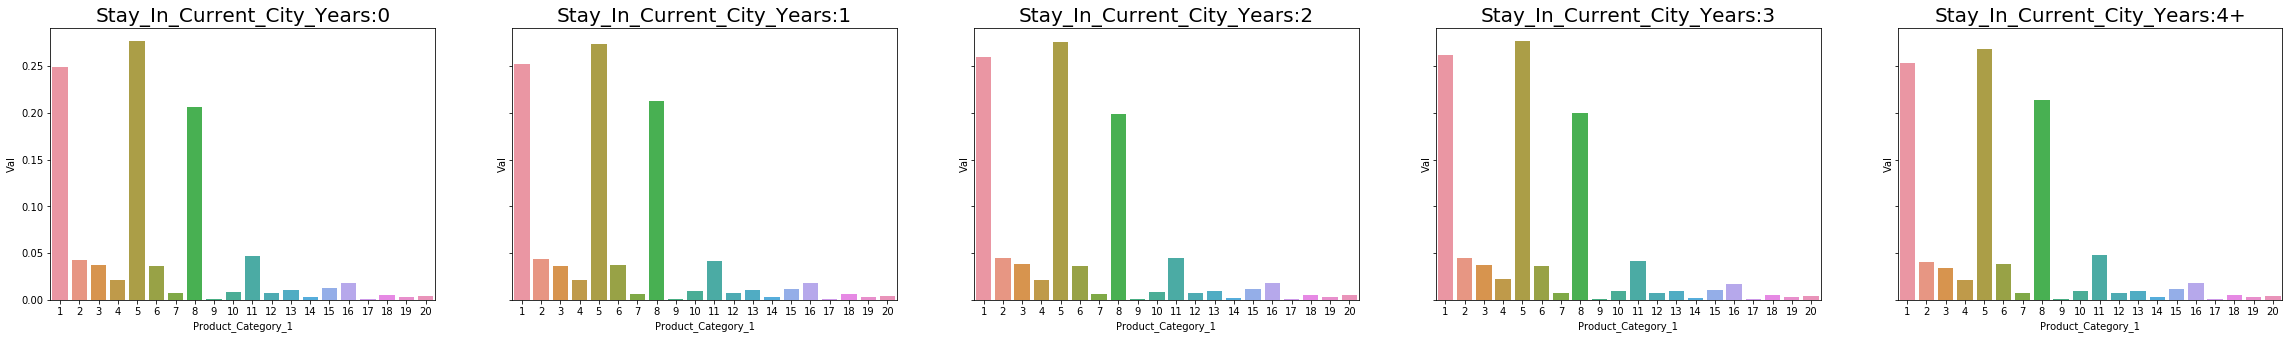

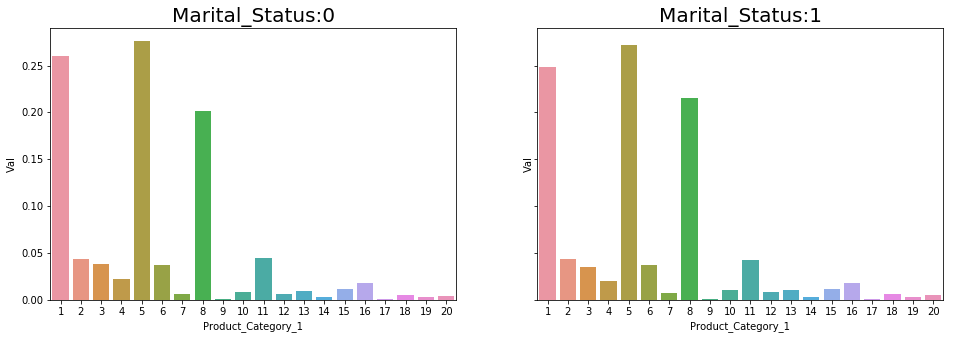

In [21]:
product_popularity_barplot('Gender')
product_popularity_barplot('Age')
product_popularity_barplot('City_Category')
product_popularity_barplot('Stay_In_Current_City_Years')
product_popularity_barplot('Marital_Status')

In [22]:
# Top 10 Purchased Items

purchase_by_prod_id=train[['Product_ID','Purchase']].groupby('Product_ID').agg('sum').reset_index().sort_values('Purchase',ascending=False).head(10)
print(purchase_by_prod_id.head(10))

     Product_ID  Purchase
249   P00025442  27995166
1016  P00110742  26722309
2443  P00255842  25168963
582   P00059442  24338343
1745  P00184942  24334887
1030  P00112142  24216006
1018  P00110942  23639564
2263  P00237542  23425576
565   P00057642  23102780
104   P00010742  22164153


In [23]:
# Users who purchased the most and their profiles

purchase_by_user=train[['User_ID','Purchase']].groupby('User_ID').agg('sum').reset_index().sort_values('Purchase',ascending=False).head(10)
temp=train[train['User_ID'].isin(list(purchase_by_user['User_ID']))][['User_ID','Gender','Age','Occupation','City_Category',
                                                          'Stay_In_Current_City_Years','Marital_Status']].drop_duplicates()
temp.merge(purchase_by_user,how='left').sort_values('Purchase',ascending=False)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
7,1004277,M,36-45,16,A,0,0,10536909
3,1001680,M,26-35,20,A,3,1,8699596
5,1002909,M,26-35,7,A,1,0,7577756
4,1001941,M,36-45,17,A,1,0,6817493
0,1000424,M,26-35,17,A,3,0,6573609
8,1004448,M,26-35,14,A,0,0,6566245
9,1005831,M,26-35,1,A,2,1,6512433
1,1001015,M,36-45,3,A,4+,1,6511314
6,1003391,M,18-25,4,A,0,0,6477160
2,1001181,M,36-45,7,A,3,1,6387961


In [24]:
# Now, actually for Apriori


# Generate a list of products purchased by each User_ID

lst=[]
for item in train['User_ID'].unique():
    lst2=list(set(train[train['User_ID']==item]['Product_ID']))
    if len(lst2)>0:
        lst.append(lst2)

In [25]:
# Transforming the transaction data into one-hot encoded data

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
df_x=pd.DataFrame(te_data,columns=te.columns_)
print(df_x.head())

   P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
0       True      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   P00000742  P00000842  P00000942  P00001042  ...  P0098942  P0099042  \
0      False      False      False      False  ...     False     False   
1      False      False      False      False  ...     False     False   
2      False      False      False      False  ...     False     False   
3      False      False      False      False  ...     False     False   
4      False      False      False      False  ...     False     False   

   P0099142  P0099242  P0099342  P0099442  P0099642  P0099742  P0099842  \
0     False     False     False     False     False  

Association Rules Metrics

support = how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

confidence (A -> B) = support (A -> B)/support(A). It is the probability of seeing the consequent in a transaction given that it also contains antecedent. The confidence of 1 (maximal) for a rule A->B means that the consequent and antecedent always occur together.

lift (A -> B) = confidence (A -> B)/support(B). To measure how much more often the antecedent and consequent of a rule A->B occur together than we would expect if they were statistically independent. If A and B are independent, the lift score will be exactly 1.

leverage (A -> B = support (A -> B) - support(A) x support (B). The difference between the observed frequency of A and B appearing together and the frequency that would be expected if A and B were independent. Leverage value of 0 indicates independence.

conviction (A -> B) = (1-support(B))/(1-confidence(A -> B)). High conviction value means that the consequent is highly depending on the antecedent. If items are independent, the conviction is 1.

In [ ]:
#get the frequent items (support >= 0.03)
frequent_items=apriori(df_x,use_colnames=True,min_support=0.03)

In [ ]:
frequent_items.head()

In [ ]:
rules=association_rules(frequent_items,metric='lift',min_threshold=1)
rules.antecedents=rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents=rules.consequents.apply(lambda x: next(iter(x)))
rules=rules.sort_values('lift',ascending=False)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import networkx as nx

nx_data=rules[rules.lift>=3]
GA=nx.from_pandas_edgelist(nx_data,source='antecedents',target='consequents',edge_attr='lift')
pos=nx.kamada_kawai_layout(GA,weight='lift')
# pos = nx.nx_agraph.graphviz_layout(GA)
# pos = nx.nx_agraph.graphviz_layout(GA, prog='dot')

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in GA.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in GA.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node,adjacencies in enumerate(GA.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0])+' - # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig, filename='networkx')

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Purchase Amount Prediction - Linear Regression

# Feature Selection based on F-values

#Convert Product Category 2 and 3 into integers
train['Product_Category_2']=train['Product_Category_2'].astype(int)
#df['Product_Category_3']=df['Product_Category_3'].astype(int)

#remove Product ID and User ID
data=train.drop(['Product_ID','User_ID'],axis=1)

#label categorical variables
data['Gender']=data['Gender'].map( {'M': 0, 'F': 1} ).astype(int)
data['City_Category']=data['City_Category'].map( {'A': 0, 'B': 1, 'C':2} ).astype(int)
data['Age']=data['Age'].map( {'0-17': 0, '18-25': 1, '26-35': 2,'36-45':3,'46-50':4,
                         '51-55':5,'55+':6} ).astype(int)
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].map( {'0': 0, '1': 1, '2': 2,'3':3,'4+':4}).astype(int)

#Get an array of feature variables X and target variable y
X=data.drop(['Purchase'],axis=1).values
y=data['Purchase'].values

#Select features to keep based on percentile of the highest scores
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)

#get the scores of all the features
name_score=list(zip(data.drop(['Purchase'],axis=1).columns.tolist(),Selector_f.scores_))
name_score_df=pd.DataFrame(data=name_score,columns=['Feat_names','F_scores'])
name_score_df.sort_values('F_scores',ascending=False)

In [ ]:
# Select top 3 features with the highest F-scores for Linear Regression

data=df.copy()
data=data[['City_Category','Product_Category_1', 
       'Product_Category_3','Purchase']]

#One-Hot Encoding
data=pd.get_dummies(data=data,columns=['City_Category','Product_Category_1','Product_Category_3'])

#Avoid dummy variable trap by removing one category of each categorical feature after encoding but before training
data.drop(['City_Category_A','Product_Category_1_1','Product_Category_3_0'],axis=1,inplace=True)

X=data.drop(['Purchase'],axis=1).values
y=data['Purchase'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
print("Prediction\n",y_pred)
print("Actual\n",y_test)

print("R_squared Score:",regressor.score(X_test,y_test))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

from sklearn.metrics import mean_squared_error
print("RMSE:",mean_squared_error(y_test,y_pred)**0.5)

In [ ]:
# Classification: Predicting Gender (Random Forest Classifier)

data=train.copy()
data.drop(['User_ID','Product_ID'],axis=1,inplace=True)

data['Gender']=data['Gender'].map( {'M': 0, 'F': 1} ).astype(int)

data['Age']=data['Age'].map( {'0-17': 0, '18-25': 1, '26-35': 2,'36-45':3,'46-50':4,
                         '51-55':5,'55+':6} ).astype(int)

data['City_Category']=data['City_Category'].map( {'A': 0, 'B': 1, 'C':2} ).astype(int)

data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].map( {'0': 0, '1': 1, '2': 2,'3':3,'4+':4}).astype(int)

X=data.drop(['Gender'],axis=1).values
y=data['Gender'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
print("Prediction:",y_pred)
print("Actual:",y_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n", cm)

from sklearn.metrics import precision_score
print("Precision Score\n",precision_score(y_test,y_pred,average=None))

from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))